Machine learning is about learning from data.

There are two things to know about data. First is "features". What is a feature?

Mathematicians call features "independent variables". Sometimes, we call them x.

A feature is a column.

A feature is an attribute.

A feature is a dimension along which we project the data.

x.

The second thing is the target (of the learning). Mathematicians call this, dependent variable or y.

# Perceptron

Vectors and dot products

$u \cdot v = \sum u_i * v_i = |u||v| \cos(\theta)$

What does the sign of a dot product look like?

### Strategy

The goal of a perceptron technique is to find a weight vector w, such that if x belongs to class +1, then $w \cdot x > 0$; and if x belongs to class -1, then $w \cdot x <0$

### How?

Go through each data point; if sign($w \cdot x$) is different from the class that $x$ belongs to $y$, then $w$ adjust $w$.

In [22]:
import pandas
import numpy

def sign(x):
    return 1 if x>0 else -1

def train(X, y, rate):
    w = numpy.array([0] * len(X.columns))
    for i in range(len(X.values)):
        xi = X.values[i]
        yi = y.values[i]
        y2 = w.dot(xi)
        if y2==0 or sign(y2)!=yi:
            w = w + rate*yi*xi
            print('w adjusted to', w)
    return w

In [29]:
url = 'https://raw.githubusercontent.com/Coaxecva/Data-Science-Analytics-in-Python-Workshop-UoM-CS-Dept/master/data/iris.csv'
df = pandas.read_csv(url)
df = df.sample(frac=1)
df['y'] = 1
df['y'] = df.y.where(df.Species=='setosa', -1)
print(df)

     SepalLength  SepalWidth  PetalLength  PetalWidth     Species  y
94           5.6         2.7          4.2         1.3  versicolor -1
75           6.6         3.0          4.4         1.4  versicolor -1
108          6.7         2.5          5.8         1.8   virginica -1
83           6.0         2.7          5.1         1.6  versicolor -1
31           5.4         3.4          1.5         0.4      setosa  1
59           5.2         2.7          3.9         1.4  versicolor -1
26           5.0         3.4          1.6         0.4      setosa  1
61           5.9         3.0          4.2         1.5  versicolor -1
13           4.3         3.0          1.1         0.1      setosa  1
133          6.3         2.8          5.1         1.5   virginica -1
97           6.2         2.9          4.3         1.3  versicolor -1
84           5.4         3.0          4.5         1.5  versicolor -1
9            4.9         3.1          1.5         0.1      setosa  1
40           5.0         3.5      

In [30]:
X = df[['SepalLength','SepalWidth']]
y = df['y']
w = train(X, y, 0.05)
print(w)

w adjusted to [-0.28  -0.135]
w adjusted to [-0.01   0.035]
w adjusted to [-0.27 -0.1 ]
w adjusted to [-0.02  0.07]
w adjusted to [-0.315 -0.08 ]
w adjusted to [-0.1   0.07]
w adjusted to [0.145 0.225]
w adjusted to [-0.13   0.105]
w adjusted to [0.145 0.315]
w adjusted to [-0.19  0.16]
w adjusted to [0.06 0.34]
w adjusted to [-0.245  0.19 ]
w adjusted to [-0.015  0.36 ]
w adjusted to [-0.305  0.22 ]
w adjusted to [-0.055  0.395]
w adjusted to [-0.415  0.235]
w adjusted to [-0.165  0.4  ]
w adjusted to [-0.45  0.26]
w adjusted to [-0.22  0.42]
w adjusted to [-0.515  0.26 ]
w adjusted to [-0.275  0.43 ]
w adjusted to [-0.035  0.58 ]
w adjusted to [-0.34  0.43]
w adjusted to [-0.095  0.58 ]
w adjusted to [-0.44   0.425]
w adjusted to [-0.19   0.575]
w adjusted to [-0.575  0.425]
w adjusted to [-0.315  0.6  ]
w adjusted to [-0.595  0.45 ]
w adjusted to [-0.34   0.625]
w adjusted to [-0.115  0.74 ]
w adjusted to [-0.43  0.57]
w adjusted to [-0.16  0.74]
w adjusted to [-0.45   0.605]
w adju

In [31]:
df['prediction'] = [ 'setosa' if w.dot(x)>0 else 'non-setosa' for x in X.values ]
df.sample(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,y,prediction
78,6.0,2.9,4.5,1.5,versicolor,-1,non-setosa
146,6.3,2.5,5.0,1.9,virginica,-1,non-setosa
12,4.8,3.0,1.4,0.1,setosa,1,non-setosa
106,4.9,2.5,4.5,1.7,virginica,-1,non-setosa
68,6.2,2.2,4.5,1.5,versicolor,-1,non-setosa
50,7.0,3.2,4.7,1.4,versicolor,-1,non-setosa
145,6.7,3.0,5.2,2.3,virginica,-1,non-setosa
107,7.3,2.9,6.3,1.8,virginica,-1,non-setosa
135,7.7,3.0,6.1,2.3,virginica,-1,non-setosa
4,5.0,3.6,1.4,0.2,setosa,1,non-setosa


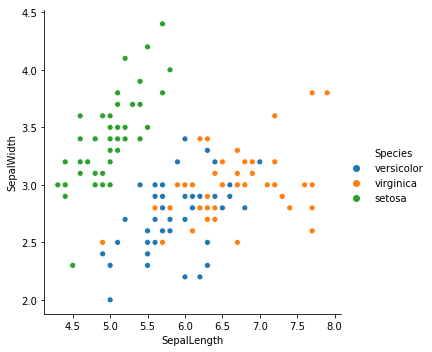

In [33]:
import seaborn
from matplotlib.pyplot import show

seaborn.relplot(x='SepalLength', y='SepalWidth', hue='Species', data=df)